<a href="https://colab.research.google.com/github/tzuyichao/python-basic/blob/master/colab/iris_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')

import pandas as pd
df = pd.read_csv('/content/MyGoogleDrive/My Drive/Python-for-Titanic/Ch06/Iris.csv')
df.head()

Mounted at /content/MyGoogleDrive


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [4]:
df = df.drop_duplicates()
df.reset_index(drop=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
s = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(s)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.cluster import KMeans
df_X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [8]:
k = 1
km = KMeans(n_clusters=k)

In [9]:
km.fit(df_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
print('分群準確率 ', km.inertia_)

分群準確率  663.895238095238


In [11]:
s = []
for k in range(1, 15):
  km = KMeans(n_clusters=k)
  km.fit(df_X)
  s.append(km.inertia_)

print(s)

[663.895238095238, 151.77145833333336, 77.91989035087718, 56.64237065018315, 45.816421929824564, 38.396735499235504, 34.00644909883145, 29.771330051212402, 27.82746975709476, 25.766726358608715, 24.084431224004753, 23.201008032816855, 21.563991337609757, 20.427172089348563]


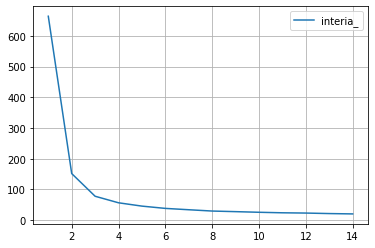

In [12]:
df_kmeans = pd.DataFrame()
df_kmeans['interia_'] = s
df_kmeans.index = list(range(1, 15))
df_kmeans.plot(grid=True)

In [13]:
k = 3
km = KMeans(n_clusters=k)
km.fit(df_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
print('分群預測結果:')
pred = km.fit_predict(df_X)
pred

分群預測結果:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

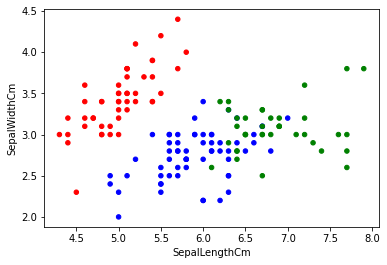

In [17]:
df1 = df_X.copy()
df1['pred'] = pred

c = {0:'r', 1:'g', 2:'b'}
df1['colors'] = df1['pred'].map(c)
df1.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', c=df1['colors'])

In [18]:
new = [[6.6, 3.1, 5.2, 2.4]]
v = km.predict(new)
print('預測結果為', v)

預測結果為 [1]
